# Coursera Data Science Captone (1)
#### This notebook will be used for the Data Science Capstone project by Jasmine :)
There is a second notebook to continue the project. This current one includes retrieval of data and exploratory analysis

In [51]:
# first things first:
import pandas as pd
import numpy as np
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


### Part 1: Police Data
- import
- clean
- exploratory analysis

In [52]:
from pathlib import Path
import matplotlib.pyplot as plt
% matplotlib inline

I have previously retrieved the data from police websites and manually transfered it to csv files. Now I just need to load the data.

For those interested, the websites are:<br>
VPD: https://vancouver.ca/police/organization/planning-research-audit/neighbourhood-statistics.html <br>
TPS: https://data.torontopolice.on.ca/pages/asr-archives<br>
SPVM: https://spvm.qc.ca/en/Pages/Discover-SPVM/Organization/Annual-Reports

In [53]:
# obtain path
folder = Path('C:/Users/jasmine/Desktop/IBM data science/9-Data Science Capstone/police reports')
vpd_data = folder / 'vpd_data.csv'
tps_data = folder / 'tps_data.csv'
spvm_data = folder / 'spvm_data.csv'

In [54]:
# read data into dataframes
vpd_df = pd.read_csv(vpd_data)
tps_df = pd.read_csv(tps_data)
spvm_df = pd.read_csv(spvm_data)

In [55]:
vpd_df.head()

,Neighbourhood,Sex Offences,Assaults,Robbery,B&E,Theft of MV,Theft from Auto,Theft<>$5K,Arson,Mischief,Offensive Weapons
0,Arbutus Ridge,5,17,1,78,13,91,93,7,33,0
1,Central_Business_District,166,1819,258,798,185,6221,4757,62,1580,463
2,Dunbar-Southlands,6,16,2,85,13,167,97,2,64,2
3,Fairview,26,119,13,317,48,851,918,7,254,17
4,Grandview-Woodland,31,236,35,292,122,673,525,9,334,21


In [56]:
tps_df.head()

,Unnamed: 0,Homicide,Unnamed: 2,Unnamed: 3,Assault,Unnamed: 5,Unnamed: 6,Attempted Murder,Unnamed: 8,Unnamed: 9,...,Unnamed: 30,Offensive Weapons,Unnamed: 32,Unnamed: 33,Controlled Drugs and Substances Act,Unnamed: 35,Unnamed: 36,Other Federal Statute Violations,Unnamed: 38,Unnamed: 39
0,Division,Occurred,Cleared,% Cleared,Occurred,Cleared,% Cleared,Reported,Cleared,% Cleared,...,% Cleared,Reported,Cleared,% Cleared,Reported,Cleared,% Cleared,Reported,Cleared,% Cleared
1,D11,4,2,50.00%,701,480,68.50%,0,0,-,...,32.10%,85,75,88.20%,89,86,96.60%,9,7,77.80%
2,D12,9,6,66.70%,741,555,74.90%,23,15,65.20%,...,47.10%,84,77,91.70%,96,94,97.90%,20,19,95.00%
3,D13,4,1,25.00%,616,407,66.10%,9,3,33.30%,...,28.30%,51,43,84.30%,46,46,100.00%,7,7,100.00%
4,D14,4,4,100.00%,"1,423",888,62.40%,4,4,100.00%,...,18.10%,91,81,89.00%,149,137,91.90%,10,10,100.00%


In [57]:
spvm_df.head()

,Neighbourhood station,Assault,Sexual assaults,Robberies,Breaking and entering,Auto theft,Petty larceny,Firearms offences,Controlled Drugs and Substances Act
0,1.0,81,22.0,17.0,69.0,66.0,202,3.0,16.0
1,3.0,394,50.0,40.0,175.0,86.0,286,6.0,33.0
2,4.0,167,25.0,31.0,74.0,60.0,190,2.0,14.0
3,5.0,284,44.0,50.0,188.0,175.0,603,7.0,23.0
4,7.0,440,67.0,73.0,271.0,377.0,756,5.0,34.0


###### 1.1 Clean up the tps_df<br>
Only include the 'cleared' column from each crime type

In [58]:
# replace the 'cleared' column with the name of the crime
# first create list crime_type
crime_type = tps_df.columns.tolist()
for i in crime_type:
    if 'Unnamed' in i:
        crime_type.remove(i)
for i in crime_type:
    if 'Unnamed' in i:
        crime_type.remove(i)
crime_type

['Homicide',
 'Assault',
 'Attempted Murder',
 'Robbery',
 'Sexual Violation',
 'Auto Theft',
 'Break & Enter',
 'Fraud',
 'Theft Over $5000',
 'Theft Under $5000',
 'Offensive Weapons',
 'Controlled Drugs and Substances Act',
 'Other Federal Statute Violations']

In [59]:
# create an index list for where we want to insert the crime type elements
header = tps_df.iloc[0,:].tolist()
ind=[]
for index, element in enumerate(header):
    if element == 'Cleared':
        ind.append(index)
print(ind)
print(header)

[2, 5, 8, 11, 14, 17, 20, 23, 26, 29, 32, 35, 38]
['Division', 'Occurred', 'Cleared', '% Cleared', 'Occurred', 'Cleared', '% Cleared', 'Reported', 'Cleared', '% Cleared', 'Reported', 'Cleared', '% Cleared', 'Reported', 'Cleared', '% Cleared', 'Reported', 'Cleared', '% Cleared', 'Reported', 'Cleared', '% Cleared', 'Reported', 'Cleared', '% Cleared', 'Reported', 'Cleared', '% Cleared', 'Reported', 'Cleared', '% Cleared', 'Reported', 'Cleared', '% Cleared', 'Reported', 'Cleared', '% Cleared', 'Reported', 'Cleared', '% Cleared']


In [60]:
# create the header list
n=0
for i in ind:
    header[i] = crime_type[n]
    n+=1
header

['Division',
 'Occurred',
 'Homicide',
 '% Cleared',
 'Occurred',
 'Assault',
 '% Cleared',
 'Reported',
 'Attempted Murder',
 '% Cleared',
 'Reported',
 'Robbery',
 '% Cleared',
 'Reported',
 'Sexual Violation',
 '% Cleared',
 'Reported',
 'Auto Theft',
 '% Cleared',
 'Reported',
 'Break & Enter',
 '% Cleared',
 'Reported',
 'Fraud',
 '% Cleared',
 'Reported',
 'Theft Over $5000',
 '% Cleared',
 'Reported',
 'Theft Under $5000',
 '% Cleared',
 'Reported',
 'Offensive Weapons',
 '% Cleared',
 'Reported',
 'Controlled Drugs and Substances Act',
 '% Cleared',
 'Reported',
 'Other Federal Statute Violations',
 '% Cleared']

In [61]:
# replace the header
tps_df.columns=header
tps_df

,Division,Occurred,Homicide,% Cleared,Occurred,Assault,% Cleared,Reported,Attempted Murder,% Cleared,...,% Cleared,Reported,Offensive Weapons,% Cleared,Reported,Controlled Drugs and Substances Act,% Cleared,Reported,Other Federal Statute Violations,% Cleared
0,Division,Occurred,Cleared,% Cleared,Occurred,Cleared,% Cleared,Reported,Cleared,% Cleared,...,% Cleared,Reported,Cleared,% Cleared,Reported,Cleared,% Cleared,Reported,Cleared,% Cleared
1,D11,4,2,50.00%,701,480,68.50%,0,0,-,...,32.10%,85,75,88.20%,89,86,96.60%,9,7,77.80%
2,D12,9,6,66.70%,741,555,74.90%,23,15,65.20%,...,47.10%,84,77,91.70%,96,94,97.90%,20,19,95.00%
3,D13,4,1,25.00%,616,407,66.10%,9,3,33.30%,...,28.30%,51,43,84.30%,46,46,100.00%,7,7,100.00%
4,D14,4,4,100.00%,"1,423",888,62.40%,4,4,100.00%,...,18.10%,91,81,89.00%,149,137,91.90%,10,10,100.00%
5,D22,5,1,20.00%,916,601,65.60%,9,7,77.80%,...,26.10%,96,92,95.80%,108,98,90.70%,12,8,66.70%
6,D23,8,4,50.00%,872,556,63.80%,6,4,66.70%,...,20.40%,60,53,88.30%,80,68,85.00%,8,6,75.00%
7,D31,8,6,75.00%,"1,396",976,69.90%,17,10,58.80%,...,33.70%,166,140,84.30%,78,72,92.30%,26,22,84.60%
8,D32,0,0,-,"1,204",771,64.00%,10,7,70.00%,...,24.80%,119,101,84.90%,53,48,90.60%,11,9,81.80%
9,D33,3,1,33.30%,720,479,66.50%,9,4,44.40%,...,23.20%,51,42,82.40%,40,34,85.00%,2,2,100.00%


In [62]:
# Remove unnecessary columns and rows
ind= [0] + ind
tps_df = tps_df.iloc[:,ind]
tps_df = tps_df.iloc[1:17,:]
tps_df.reset_index(drop=True, inplace=True)
tps_df

,Division,Homicide,Assault,Attempted Murder,Robbery,Sexual Violation,Auto Theft,Break & Enter,Fraud,Theft Over $5000,Theft Under $5000,Offensive Weapons,Controlled Drugs and Substances Act,Other Federal Statute Violations
0,D11,2,480,0,71,67,41,88,76,11,852,75,86,7
1,D12,6,555,15,43,79,93,65,125,16,707,77,94,19
2,D13,1,407,3,65,64,53,124,70,5,458,43,46,7
3,D14,4,888,4,73,115,43,199,240,21,777,81,137,10
4,D22,1,601,7,81,81,32,115,138,15,837,92,98,8
5,D23,4,556,4,89,96,52,44,111,17,439,53,68,6
6,D31,6,976,10,106,135,60,113,79,21,795,140,72,22
7,D32,0,771,7,63,96,68,71,150,25,"1,062",101,48,9
8,D33,1,479,4,40,59,42,25,64,12,504,42,34,2
9,D41,3,896,2,90,120,34,136,125,8,"1,301",119,88,10


Much better :)

###### 1.2 Make columns uniform across all three dataframes <br>
I will only include columns that are common to all three police datasets. Upon inspection, these are:<br><br>
Neighborhood<br>
Sex Offences<br>
Assaults<br>
Robbery<br>
Break & enter<br>
Auto Theft<br>
Other Theft<br>
Offensive Weapons<br><br>

Some columns will have to be combined, some renamed, and others dropped. 

In [63]:
# VPD
vpd_df

,Neighbourhood,Sex Offences,Assaults,Robbery,B&E,Theft of MV,Theft from Auto,Theft<>$5K,Arson,Mischief,Offensive Weapons
0,Arbutus Ridge,5,17,1,78,13,91,93,7,33,0
1,Central_Business_District,166,1819,258,798,185,6221,4757,62,1580,463
2,Dunbar-Southlands,6,16,2,85,13,167,97,2,64,2
3,Fairview,26,119,13,317,48,851,918,7,254,17
4,Grandview-Woodland,31,236,35,292,122,673,525,9,334,21
5,Hastings-Sunrise,27,118,12,197,85,656,260,2,207,7
6,Kensington-Cedar_Cottage,27,155,24,206,86,652,436,7,263,22
7,Kerrisdale,3,18,3,138,23,150,101,4,46,3
8,Killarney,11,50,4,77,38,248,165,2,80,7
9,Kitsilano,20,92,10,254,61,612,546,9,212,9


In [64]:
vpd_df.dtypes

Neighbourhood        object
Sex Offences          int64
Assaults              int64
Robbery               int64
B&E                   int64
Theft of MV           int64
Theft from Auto       int64
Theft<>$5K            int64
Arson                 int64
Mischief              int64
Offensive Weapons     int64
dtype: object

In [65]:
# combine columns
col = vpd_df['Theft from Auto'] + vpd_df['Theft<>$5K']
vpd_df['Other Theft'] = col
vpd_df.head()

,Neighbourhood,Sex Offences,Assaults,Robbery,B&E,Theft of MV,Theft from Auto,Theft<>$5K,Arson,Mischief,Offensive Weapons,Other Theft
0,Arbutus Ridge,5,17,1,78,13,91,93,7,33,0,184
1,Central_Business_District,166,1819,258,798,185,6221,4757,62,1580,463,10978
2,Dunbar-Southlands,6,16,2,85,13,167,97,2,64,2,264
3,Fairview,26,119,13,317,48,851,918,7,254,17,1769
4,Grandview-Woodland,31,236,35,292,122,673,525,9,334,21,1198


In [66]:
# drop columns
vpd_df.drop(['Theft from Auto','Theft<>$5K','Arson','Mischief'], axis=1, inplace=True)
vpd_df.head()

,Neighbourhood,Sex Offences,Assaults,Robbery,B&E,Theft of MV,Offensive Weapons,Other Theft
0,Arbutus Ridge,5,17,1,78,13,0,184
1,Central_Business_District,166,1819,258,798,185,463,10978
2,Dunbar-Southlands,6,16,2,85,13,2,264
3,Fairview,26,119,13,317,48,17,1769
4,Grandview-Woodland,31,236,35,292,122,21,1198


In [67]:
# reorganize and rename columns
vpd_df = vpd_df[['Neighbourhood','Sex Offences','Assaults','Robbery','B&E','Theft of MV','Other Theft' ,'Offensive Weapons']]
col_names = ['Neighborhood','Sex Offences','Assaults','Robbery','Break & Enter','Auto Theft','Other Theft', 'Offensive Weapons']
vpd_df.columns = col_names
vpd_df.head()

,Neighborhood,Sex Offences,Assaults,Robbery,Break & Enter,Auto Theft,Other Theft,Offensive Weapons
0,Arbutus Ridge,5,17,1,78,13,184,0
1,Central_Business_District,166,1819,258,798,185,10978,463
2,Dunbar-Southlands,6,16,2,85,13,264,2
3,Fairview,26,119,13,317,48,1769,17
4,Grandview-Woodland,31,236,35,292,122,1198,21


In [68]:
# TPS
tps_df

,Division,Homicide,Assault,Attempted Murder,Robbery,Sexual Violation,Auto Theft,Break & Enter,Fraud,Theft Over $5000,Theft Under $5000,Offensive Weapons,Controlled Drugs and Substances Act,Other Federal Statute Violations
0,D11,2,480,0,71,67,41,88,76,11,852,75,86,7
1,D12,6,555,15,43,79,93,65,125,16,707,77,94,19
2,D13,1,407,3,65,64,53,124,70,5,458,43,46,7
3,D14,4,888,4,73,115,43,199,240,21,777,81,137,10
4,D22,1,601,7,81,81,32,115,138,15,837,92,98,8
5,D23,4,556,4,89,96,52,44,111,17,439,53,68,6
6,D31,6,976,10,106,135,60,113,79,21,795,140,72,22
7,D32,0,771,7,63,96,68,71,150,25,"1,062",101,48,9
8,D33,1,479,4,40,59,42,25,64,12,504,42,34,2
9,D41,3,896,2,90,120,34,136,125,8,"1,301",119,88,10


In [69]:
tps_df.dtypes

Division                               object
Homicide                               object
Assault                                object
Attempted Murder                       object
Robbery                                object
Sexual Violation                       object
Auto Theft                             object
Break & Enter                          object
Fraud                                  object
Theft Over $5000                       object
Theft Under $5000                      object
Offensive Weapons                      object
Controlled Drugs and Substances Act    object
Other Federal Statute Violations       object
dtype: object

Need to convert object types to integer types

In [70]:
# get rid of commas in the data
def no_commas(list):
    '''
    input a list of numerical strings, get rid of commas in every element of list and returns the list
    '''
    n=0
    for element in list:
        if ',' in element:
            list[n] = element.replace(',','')
        n+=1
    return list

In [71]:
assault = no_commas(tps_df['Assault'].tolist())
theftunder5k = no_commas(tps_df['Theft Under $5000'].tolist())
theftunder5k

['852',
 '707',
 '458',
 '777',
 '837',
 '439',
 '795',
 '1062',
 '504',
 '1301',
 '626',
 '1082',
 '1072',
 '1729',
 '803',
 '1039']

In [72]:
tps_df['Assault'] = pd.Series(assault)
tps_df['Theft Under $5000'] = pd.Series(theftunder5k)
tps_df

,Division,Homicide,Assault,Attempted Murder,Robbery,Sexual Violation,Auto Theft,Break & Enter,Fraud,Theft Over $5000,Theft Under $5000,Offensive Weapons,Controlled Drugs and Substances Act,Other Federal Statute Violations
0,D11,2,480,0,71,67,41,88,76,11,852,75,86,7
1,D12,6,555,15,43,79,93,65,125,16,707,77,94,19
2,D13,1,407,3,65,64,53,124,70,5,458,43,46,7
3,D14,4,888,4,73,115,43,199,240,21,777,81,137,10
4,D22,1,601,7,81,81,32,115,138,15,837,92,98,8
5,D23,4,556,4,89,96,52,44,111,17,439,53,68,6
6,D31,6,976,10,106,135,60,113,79,21,795,140,72,22
7,D32,0,771,7,63,96,68,71,150,25,1062,101,48,9
8,D33,1,479,4,40,59,42,25,64,12,504,42,34,2
9,D41,3,896,2,90,120,34,136,125,8,1301,119,88,10


In [73]:
# now that there is no commas, we can convert the appropriate columns to integer type
A=tps_df[['Division']]
B=tps_df.iloc[:,1:].astype('int64')
print(A.dtypes)
print(B.dtypes)

Division    object
dtype: object
Homicide                               int64
Assault                                int64
Attempted Murder                       int64
Robbery                                int64
Sexual Violation                       int64
Auto Theft                             int64
Break & Enter                          int64
Fraud                                  int64
Theft Over $5000                       int64
Theft Under $5000                      int64
Offensive Weapons                      int64
Controlled Drugs and Substances Act    int64
Other Federal Statute Violations       int64
dtype: object


In [74]:
tps_df = pd.merge(A, B, left_index=True, right_index=True)

In [75]:
tps_df.dtypes

Division                               object
Homicide                                int64
Assault                                 int64
Attempted Murder                        int64
Robbery                                 int64
Sexual Violation                        int64
Auto Theft                              int64
Break & Enter                           int64
Fraud                                   int64
Theft Over $5000                        int64
Theft Under $5000                       int64
Offensive Weapons                       int64
Controlled Drugs and Substances Act     int64
Other Federal Statute Violations        int64
dtype: object

success!

In [76]:
# now we can go ahead with combining columns
col = tps_df['Theft Over $5000'] + tps_df['Theft Under $5000']
tps_df['Other Theft'] = col
tps_df.head()

,Division,Homicide,Assault,Attempted Murder,Robbery,Sexual Violation,Auto Theft,Break & Enter,Fraud,Theft Over $5000,Theft Under $5000,Offensive Weapons,Controlled Drugs and Substances Act,Other Federal Statute Violations,Other Theft
0,D11,2,480,0,71,67,41,88,76,11,852,75,86,7,863
1,D12,6,555,15,43,79,93,65,125,16,707,77,94,19,723
2,D13,1,407,3,65,64,53,124,70,5,458,43,46,7,463
3,D14,4,888,4,73,115,43,199,240,21,777,81,137,10,798
4,D22,1,601,7,81,81,32,115,138,15,837,92,98,8,852


In [77]:
# drop columns
tps_df.drop(['Homicide','Attempted Murder',
             'Fraud','Theft Over $5000',
             'Theft Under $5000', 
             'Controlled Drugs and Substances Act',
             'Other Federal Statute Violations'],
           axis=1, inplace=True)
tps_df.head()

,Division,Assault,Robbery,Sexual Violation,Auto Theft,Break & Enter,Offensive Weapons,Other Theft
0,D11,480,71,67,41,88,75,863
1,D12,555,43,79,93,65,77,723
2,D13,407,65,64,53,124,43,463
3,D14,888,73,115,43,199,81,798
4,D22,601,81,81,32,115,92,852


In [78]:
# reorganize and rename columns
tps_df = tps_df[['Division',
                 'Sexual Violation',
                 'Assault', 'Robbery',
                 'Break & Enter',
                 'Auto Theft',
                 'Other Theft',
                 'Offensive Weapons']]
tps_df.columns = col_names
tps_df

,Neighborhood,Sex Offences,Assaults,Robbery,Break & Enter,Auto Theft,Other Theft,Offensive Weapons
0,D11,67,480,71,88,41,863,75
1,D12,79,555,43,65,93,723,77
2,D13,64,407,65,124,53,463,43
3,D14,115,888,73,199,43,798,81
4,D22,81,601,81,115,32,852,92
5,D23,96,556,89,44,52,456,53
6,D31,135,976,106,113,60,816,140
7,D32,96,771,63,71,68,1087,101
8,D33,59,479,40,25,42,516,42
9,D41,120,896,90,136,34,1309,119


In [79]:
# SPVM
spvm_df

,Neighbourhood station,Assault,Sexual assaults,Robberies,Breaking and entering,Auto theft,Petty larceny,Firearms offences,Controlled Drugs and Substances Act
0,1.0,81,22.0,17.0,69.0,66.0,202,3.0,16.0
1,3.0,394,50.0,40.0,175.0,86.0,286,6.0,33.0
2,4.0,167,25.0,31.0,74.0,60.0,190,2.0,14.0
3,5.0,284,44.0,50.0,188.0,175.0,603,7.0,23.0
4,7.0,440,67.0,73.0,271.0,377.0,756,5.0,34.0
5,8.0,522,58.0,52.0,148.0,69.0,411,10.0,36.0
6,9.0,89,11.0,15.0,68.0,45.0,179,2.0,8.0
7,11.0,447,44.0,83.0,174.0,88.0,494,10.0,48.0
8,13.0,527,62.0,77.0,211.0,99.0,724,4.0,32.0
9,26.0,660,82.0,144.0,363.0,258.0,"1,389",13.0,86.0


In [80]:
spvm_df.dtypes

Neighbourhood station                  float64
Assault                                 object
Sexual assaults                        float64
Robberies                              float64
Breaking and entering                  float64
Auto theft                             float64
Petty larceny                           object
Firearms offences                      float64
Controlled Drugs and Substances Act    float64
dtype: object

In [81]:
# change the two object type columns into float64 like the rest
# convert to strings in order to use no_commas function
spvm_df['Assault'] = spvm_df['Assault'].astype('str')
spvm_df['Petty larceny'] = spvm_df['Petty larceny'].astype('str')

In [82]:
# remove commas
assault = no_commas(spvm_df['Assault'].tolist())
pettylarceny = no_commas(spvm_df['Petty larceny'].tolist())
pettylarceny

['202',
 '286',
 '190',
 '603',
 '756',
 '411',
 '179',
 '494',
 '724',
 '1389',
 '150',
 '675',
 '798',
 '500',
 '2687',
 '2343',
 '814',
 '173',
 '452',
 '686',
 '581',
 '465',
 '213',
 '699',
 '2025',
 '870',
 '667',
 '747',
 '787',
 '315',
 '590',
 '934',
 '474',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan']

In [83]:
# add back into dataframe
spvm_df['Assault'] = pd.Series(assault).astype('float64')
spvm_df['Petty larceny'] = pd.Series(pettylarceny).astype('float64')
spvm_df

,Neighbourhood station,Assault,Sexual assaults,Robberies,Breaking and entering,Auto theft,Petty larceny,Firearms offences,Controlled Drugs and Substances Act
0,1.0,81.0,22.0,17.0,69.0,66.0,202.0,3.0,16.0
1,3.0,394.0,50.0,40.0,175.0,86.0,286.0,6.0,33.0
2,4.0,167.0,25.0,31.0,74.0,60.0,190.0,2.0,14.0
3,5.0,284.0,44.0,50.0,188.0,175.0,603.0,7.0,23.0
4,7.0,440.0,67.0,73.0,271.0,377.0,756.0,5.0,34.0
5,8.0,522.0,58.0,52.0,148.0,69.0,411.0,10.0,36.0
6,9.0,89.0,11.0,15.0,68.0,45.0,179.0,2.0,8.0
7,11.0,447.0,44.0,83.0,174.0,88.0,494.0,10.0,48.0
8,13.0,527.0,62.0,77.0,211.0,99.0,724.0,4.0,32.0
9,26.0,660.0,82.0,144.0,363.0,258.0,1389.0,13.0,86.0


In [84]:
spvm_df.dtypes

Neighbourhood station                  float64
Assault                                float64
Sexual assaults                        float64
Robberies                              float64
Breaking and entering                  float64
Auto theft                             float64
Petty larceny                          float64
Firearms offences                      float64
Controlled Drugs and Substances Act    float64
dtype: object

Nice

In [85]:
# get rid of NaN rows
spvm_df.loc[np.isnan(spvm_df['Assault'])].index

Int64Index([ 33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,
             46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,
             59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,
             72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,
             85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
             98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110,
            111, 112, 113, 114, 115, 116, 117, 118],
           dtype='int64')

In [86]:
spvm_df = spvm_df.iloc[:33,:]
spvm_df

,Neighbourhood station,Assault,Sexual assaults,Robberies,Breaking and entering,Auto theft,Petty larceny,Firearms offences,Controlled Drugs and Substances Act
0,1.0,81.0,22.0,17.0,69.0,66.0,202.0,3.0,16.0
1,3.0,394.0,50.0,40.0,175.0,86.0,286.0,6.0,33.0
2,4.0,167.0,25.0,31.0,74.0,60.0,190.0,2.0,14.0
3,5.0,284.0,44.0,50.0,188.0,175.0,603.0,7.0,23.0
4,7.0,440.0,67.0,73.0,271.0,377.0,756.0,5.0,34.0
5,8.0,522.0,58.0,52.0,148.0,69.0,411.0,10.0,36.0
6,9.0,89.0,11.0,15.0,68.0,45.0,179.0,2.0,8.0
7,11.0,447.0,44.0,83.0,174.0,88.0,494.0,10.0,48.0
8,13.0,527.0,62.0,77.0,211.0,99.0,724.0,4.0,32.0
9,26.0,660.0,82.0,144.0,363.0,258.0,1389.0,13.0,86.0


In [87]:
# drop columns
spvm_df.drop(['Controlled Drugs and Substances Act'], axis=1, inplace=True)
spvm_df.head()

C:\Users\jasmine\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Neighbourhood station,Assault,Sexual assaults,Robberies,Breaking and entering,Auto theft,Petty larceny,Firearms offences
0,1.0,81.0,22.0,17.0,69.0,66.0,202.0,3.0
1,3.0,394.0,50.0,40.0,175.0,86.0,286.0,6.0
2,4.0,167.0,25.0,31.0,74.0,60.0,190.0,2.0
3,5.0,284.0,44.0,50.0,188.0,175.0,603.0,7.0
4,7.0,440.0,67.0,73.0,271.0,377.0,756.0,5.0


In [88]:
# reorganize and rename columns
spvm_df = spvm_df[['Neighbourhood station',
                  'Sexual assaults',
                  'Assault',
                  'Robberies',
                  'Breaking and entering',
                  'Auto theft',
                  'Petty larceny',
                  'Firearms offences']]
spvm_df.columns = col_names
spvm_df

,Neighborhood,Sex Offences,Assaults,Robbery,Break & Enter,Auto Theft,Other Theft,Offensive Weapons
0,1.0,22.0,81.0,17.0,69.0,66.0,202.0,3.0
1,3.0,50.0,394.0,40.0,175.0,86.0,286.0,6.0
2,4.0,25.0,167.0,31.0,74.0,60.0,190.0,2.0
3,5.0,44.0,284.0,50.0,188.0,175.0,603.0,7.0
4,7.0,67.0,440.0,73.0,271.0,377.0,756.0,5.0
5,8.0,58.0,522.0,52.0,148.0,69.0,411.0,10.0
6,9.0,11.0,89.0,15.0,68.0,45.0,179.0,2.0
7,11.0,44.0,447.0,83.0,174.0,88.0,494.0,10.0
8,13.0,62.0,527.0,77.0,211.0,99.0,724.0,4.0
9,26.0,82.0,660.0,144.0,363.0,258.0,1389.0,13.0


Great, now all three dataframes have the same columns in the same order

###### 1.3 Calculate crime rate <br>
I want to normalize the crime data in each city for fair comparison. I will define the neighborhood by its crime rate with respect to the total crime of the city rather than the raw crime number.<br><br>
As mentioned in the report, The rate for a specific crime type in a specific neighborhood will be calculated as follows:<br><br>
$$
\frac{\text{# occurrences of that crime type in that neighborhood}}{\text{all occurrences of that crime across all neighborhoods in that municipality}}
$$

In [89]:
# VPD
vpd_df

,Neighborhood,Sex Offences,Assaults,Robbery,Break & Enter,Auto Theft,Other Theft,Offensive Weapons
0,Arbutus Ridge,5,17,1,78,13,184,0
1,Central_Business_District,166,1819,258,798,185,10978,463
2,Dunbar-Southlands,6,16,2,85,13,264,2
3,Fairview,26,119,13,317,48,1769,17
4,Grandview-Woodland,31,236,35,292,122,1198,21
5,Hastings-Sunrise,27,118,12,197,85,916,7
6,Kensington-Cedar_Cottage,27,155,24,206,86,1088,22
7,Kerrisdale,3,18,3,138,23,251,3
8,Killarney,11,50,4,77,38,413,7
9,Kitsilano,20,92,10,254,61,1158,9


In [90]:
# do not want row containing grand_total
vpd_df = vpd_df.iloc[:24,:]
vpd_df

,Neighborhood,Sex Offences,Assaults,Robbery,Break & Enter,Auto Theft,Other Theft,Offensive Weapons
0,Arbutus Ridge,5,17,1,78,13,184,0
1,Central_Business_District,166,1819,258,798,185,10978,463
2,Dunbar-Southlands,6,16,2,85,13,264,2
3,Fairview,26,119,13,317,48,1769,17
4,Grandview-Woodland,31,236,35,292,122,1198,21
5,Hastings-Sunrise,27,118,12,197,85,916,7
6,Kensington-Cedar_Cottage,27,155,24,206,86,1088,22
7,Kerrisdale,3,18,3,138,23,251,3
8,Killarney,11,50,4,77,38,413,7
9,Kitsilano,20,92,10,254,61,1158,9


In [91]:
# make a function
def cal_rate(df):
    '''Given a dataframe, iterate through all columns except the first, calculating the rate of each cell with respect to 
    the total sum of that column. Replace the rates with the original values and return the new dataframe.'''
    col_names = df.columns
    col_names = col_names[1:] # skip the first column because it is the neighborhood names column
    for col in col_names:
        total = df[col].sum()
        if total==0:
            df[col] = 0
        else:
            df[col] = df[col]/total
    return df

In [92]:
vpd_df = cal_rate(vpd_df)
vpd_df

C:\Users\jasmine\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


,Neighborhood,Sex Offences,Assaults,Robbery,Break & Enter,Auto Theft,Other Theft,Offensive Weapons
0,Arbutus Ridge,0.009524,0.003778,0.001608,0.016613,0.009393,0.006241,0.000000
1,Central_Business_District,0.316190,0.404222,0.414791,0.169968,0.133671,0.372350,0.537123
2,Dunbar-Southlands,0.011429,0.003556,0.003215,0.018104,0.009393,0.008954,0.002320
3,Fairview,0.049524,0.026444,0.020900,0.067519,0.034682,0.060001,0.019722
4,Grandview-Woodland,0.059048,0.052444,0.056270,0.062194,0.088150,0.040634,0.024362
5,Hastings-Sunrise,0.051429,0.026222,0.019293,0.041960,0.061416,0.031069,0.008121
6,Kensington-Cedar_Cottage,0.051429,0.034444,0.038585,0.043876,0.062139,0.036903,0.025522
7,Kerrisdale,0.005714,0.004000,0.004823,0.029393,0.016618,0.008513,0.003480
8,Killarney,0.020952,0.011111,0.006431,0.016400,0.027457,0.014008,0.008121
9,Kitsilano,0.038095,0.020444,0.016077,0.054100,0.044075,0.039277,0.010441


In [93]:
# TPS
tps_df

,Neighborhood,Sex Offences,Assaults,Robbery,Break & Enter,Auto Theft,Other Theft,Offensive Weapons
0,D11,67,480,71,88,41,863,75
1,D12,79,555,43,65,93,723,77
2,D13,64,407,65,124,53,463,43
3,D14,115,888,73,199,43,798,81
4,D22,81,601,81,115,32,852,92
5,D23,96,556,89,44,52,456,53
6,D31,135,976,106,113,60,816,140
7,D32,96,771,63,71,68,1087,101
8,D33,59,479,40,25,42,516,42
9,D41,120,896,90,136,34,1309,119


In [94]:
tps_df = cal_rate(tps_df)
tps_df

,Neighborhood,Sex Offences,Assaults,Robbery,Break & Enter,Auto Theft,Other Theft,Offensive Weapons
0,D11,0.042894,0.039798,0.053788,0.044557,0.049220,0.060135,0.046904
1,D12,0.050576,0.046016,0.032576,0.032911,0.111645,0.050380,0.048155
2,D13,0.040973,0.033745,0.049242,0.062785,0.063625,0.032263,0.026892
3,D14,0.073624,0.073626,0.055303,0.100759,0.051621,0.055606,0.050657
4,D22,0.051857,0.049830,0.061364,0.058228,0.038415,0.059369,0.057536
5,D23,0.061460,0.046099,0.067424,0.022278,0.062425,0.031775,0.033146
6,D31,0.086428,0.080922,0.080303,0.057215,0.072029,0.056860,0.087555
7,D32,0.061460,0.063925,0.047727,0.035949,0.081633,0.075744,0.063164
8,D33,0.037772,0.039715,0.030303,0.012658,0.050420,0.035956,0.026266
9,D41,0.076825,0.074289,0.068182,0.068861,0.040816,0.091213,0.074422


In [95]:
# SPVM
spvm_df

,Neighborhood,Sex Offences,Assaults,Robbery,Break & Enter,Auto Theft,Other Theft,Offensive Weapons
0,1.0,22.0,81.0,17.0,69.0,66.0,202.0,3.0
1,3.0,50.0,394.0,40.0,175.0,86.0,286.0,6.0
2,4.0,25.0,167.0,31.0,74.0,60.0,190.0,2.0
3,5.0,44.0,284.0,50.0,188.0,175.0,603.0,7.0
4,7.0,67.0,440.0,73.0,271.0,377.0,756.0,5.0
5,8.0,58.0,522.0,52.0,148.0,69.0,411.0,10.0
6,9.0,11.0,89.0,15.0,68.0,45.0,179.0,2.0
7,11.0,44.0,447.0,83.0,174.0,88.0,494.0,10.0
8,13.0,62.0,527.0,77.0,211.0,99.0,724.0,4.0
9,26.0,82.0,660.0,144.0,363.0,258.0,1389.0,13.0


In [96]:
spvm_df = cal_rate(spvm_df)
spvm_df

,Neighborhood,Sex Offences,Assaults,Robbery,Break & Enter,Auto Theft,Other Theft,Offensive Weapons
0,1.0,0.011242,0.006102,0.007122,0.009866,0.015274,0.008459,0.008721
1,3.0,0.025549,0.029680,0.016757,0.025021,0.019903,0.011977,0.017442
2,4.0,0.012775,0.012580,0.012987,0.010580,0.013886,0.007957,0.005814
3,5.0,0.022483,0.021394,0.020947,0.026880,0.040500,0.025252,0.020349
4,7.0,0.034236,0.033145,0.030582,0.038747,0.087248,0.031660,0.014535
5,8.0,0.029637,0.039322,0.021785,0.021161,0.015969,0.017212,0.029070
6,9.0,0.005621,0.006704,0.006284,0.009723,0.010414,0.007496,0.005814
7,11.0,0.022483,0.033672,0.034772,0.024878,0.020366,0.020688,0.029070
8,13.0,0.031681,0.039699,0.032258,0.030169,0.022911,0.030320,0.011628
9,26.0,0.041901,0.049718,0.060327,0.051902,0.059708,0.058168,0.037791


###### 1.4 Exploratory data analysis
Here I will do two things:
1. Merge the dataframes into one
2. Compute boxplot for each crime type

In [97]:
# merge dataframes
# first add police name in front of each Neighoborhood name
# VPD
vpd_df['Neighborhood'] = 'VPD ' + vpd_df['Neighborhood']
vpd_df

C:\Users\jasmine\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Neighborhood,Sex Offences,Assaults,Robbery,Break & Enter,Auto Theft,Other Theft,Offensive Weapons
0,VPD Arbutus Ridge,0.009524,0.003778,0.001608,0.016613,0.009393,0.006241,0.000000
1,VPD Central_Business_District,0.316190,0.404222,0.414791,0.169968,0.133671,0.372350,0.537123
2,VPD Dunbar-Southlands,0.011429,0.003556,0.003215,0.018104,0.009393,0.008954,0.002320
3,VPD Fairview,0.049524,0.026444,0.020900,0.067519,0.034682,0.060001,0.019722
4,VPD Grandview-Woodland,0.059048,0.052444,0.056270,0.062194,0.088150,0.040634,0.024362
5,VPD Hastings-Sunrise,0.051429,0.026222,0.019293,0.041960,0.061416,0.031069,0.008121
6,VPD Kensington-Cedar_Cottage,0.051429,0.034444,0.038585,0.043876,0.062139,0.036903,0.025522
7,VPD Kerrisdale,0.005714,0.004000,0.004823,0.029393,0.016618,0.008513,0.003480
8,VPD Killarney,0.020952,0.011111,0.006431,0.016400,0.027457,0.014008,0.008121
9,VPD Kitsilano,0.038095,0.020444,0.016077,0.054100,0.044075,0.039277,0.010441


In [98]:
# TPS
tps_df['Neighborhood'] = 'TPS ' + tps_df['Neighborhood']
tps_df

,Neighborhood,Sex Offences,Assaults,Robbery,Break & Enter,Auto Theft,Other Theft,Offensive Weapons
0,TPS D11,0.042894,0.039798,0.053788,0.044557,0.049220,0.060135,0.046904
1,TPS D12,0.050576,0.046016,0.032576,0.032911,0.111645,0.050380,0.048155
2,TPS D13,0.040973,0.033745,0.049242,0.062785,0.063625,0.032263,0.026892
3,TPS D14,0.073624,0.073626,0.055303,0.100759,0.051621,0.055606,0.050657
4,TPS D22,0.051857,0.049830,0.061364,0.058228,0.038415,0.059369,0.057536
5,TPS D23,0.061460,0.046099,0.067424,0.022278,0.062425,0.031775,0.033146
6,TPS D31,0.086428,0.080922,0.080303,0.057215,0.072029,0.056860,0.087555
7,TPS D32,0.061460,0.063925,0.047727,0.035949,0.081633,0.075744,0.063164
8,TPS D33,0.037772,0.039715,0.030303,0.012658,0.050420,0.035956,0.026266
9,TPS D41,0.076825,0.074289,0.068182,0.068861,0.040816,0.091213,0.074422


In [99]:
# SPVM
spvm_df['Neighborhood'] = spvm_df['Neighborhood'].map(str)
spvm_df['Neighborhood'] = 'SPVM ' + spvm_df['Neighborhood']
spvm_df

,Neighborhood,Sex Offences,Assaults,Robbery,Break & Enter,Auto Theft,Other Theft,Offensive Weapons
0,SPVM 1.0,0.011242,0.006102,0.007122,0.009866,0.015274,0.008459,0.008721
1,SPVM 3.0,0.025549,0.029680,0.016757,0.025021,0.019903,0.011977,0.017442
2,SPVM 4.0,0.012775,0.012580,0.012987,0.010580,0.013886,0.007957,0.005814
3,SPVM 5.0,0.022483,0.021394,0.020947,0.026880,0.040500,0.025252,0.020349
4,SPVM 7.0,0.034236,0.033145,0.030582,0.038747,0.087248,0.031660,0.014535
5,SPVM 8.0,0.029637,0.039322,0.021785,0.021161,0.015969,0.017212,0.029070
6,SPVM 9.0,0.005621,0.006704,0.006284,0.009723,0.010414,0.007496,0.005814
7,SPVM 11.0,0.022483,0.033672,0.034772,0.024878,0.020366,0.020688,0.029070
8,SPVM 13.0,0.031681,0.039699,0.032258,0.030169,0.022911,0.030320,0.011628
9,SPVM 26.0,0.041901,0.049718,0.060327,0.051902,0.059708,0.058168,0.037791


In [100]:
# concatenate into one dataframe
pol_df = pd.concat([vpd_df, tps_df, spvm_df], ignore_index=True)
pol_df

,Neighborhood,Sex Offences,Assaults,Robbery,Break & Enter,Auto Theft,Other Theft,Offensive Weapons
0,VPD Arbutus Ridge,0.009524,0.003778,0.001608,0.016613,0.009393,0.006241,0.000000
1,VPD Central_Business_District,0.316190,0.404222,0.414791,0.169968,0.133671,0.372350,0.537123
2,VPD Dunbar-Southlands,0.011429,0.003556,0.003215,0.018104,0.009393,0.008954,0.002320
3,VPD Fairview,0.049524,0.026444,0.020900,0.067519,0.034682,0.060001,0.019722
4,VPD Grandview-Woodland,0.059048,0.052444,0.056270,0.062194,0.088150,0.040634,0.024362
5,VPD Hastings-Sunrise,0.051429,0.026222,0.019293,0.041960,0.061416,0.031069,0.008121
6,VPD Kensington-Cedar_Cottage,0.051429,0.034444,0.038585,0.043876,0.062139,0.036903,0.025522
7,VPD Kerrisdale,0.005714,0.004000,0.004823,0.029393,0.016618,0.008513,0.003480
8,VPD Killarney,0.020952,0.011111,0.006431,0.016400,0.027457,0.014008,0.008121
9,VPD Kitsilano,0.038095,0.020444,0.016077,0.054100,0.044075,0.039277,0.010441


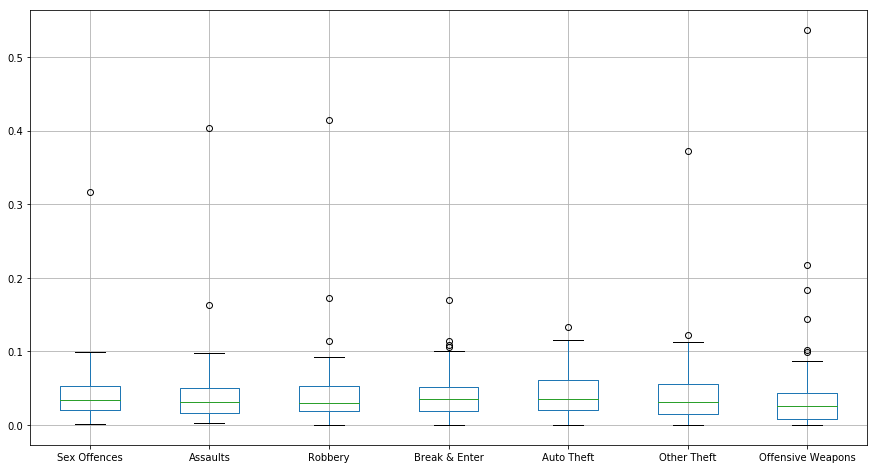

In [101]:
boxplot = pol_df.boxplot(figsize=(15,8))

The interquartile range of each crime type is very similar, all below 0.1. However there are some notable outliers in each case.

In [102]:
pol_df.loc[pol_df['Sex Offences']==pol_df['Sex Offences'].max()]

,Neighborhood,Sex Offences,Assaults,Robbery,Break & Enter,Auto Theft,Other Theft,Offensive Weapons
1,VPD Central_Business_District,0.31619,0.404222,0.414791,0.169968,0.133671,0.37235,0.537123


This particular Vancouver neighborhood contributes to most of the outliers from the boxplot

In [103]:
pol_df.sort_values(by='Sex Offences', axis=0, ascending=False).head(10)

,Neighborhood,Sex Offences,Assaults,Robbery,Break & Enter,Auto Theft,Other Theft,Offensive Weapons
1,VPD Central_Business_District,0.316190,0.404222,0.414791,0.169968,0.133671,0.372350,0.537123
22,VPD West_End,0.099048,0.077111,0.067524,0.065815,0.075145,0.091171,0.024362
30,TPS D31,0.086428,0.080922,0.080303,0.057215,0.072029,0.056860,0.087555
39,TPS D54/D55,0.085787,0.086228,0.077273,0.081519,0.048019,0.073932,0.075672
35,TPS D43,0.083227,0.098333,0.114394,0.106329,0.115246,0.075953,0.099437
19,VPD Strathcona,0.080000,0.163111,0.172026,0.072630,0.072977,0.052030,0.216937
36,TPS D51,0.079385,0.095846,0.092424,0.113924,0.061224,0.076719,0.144465
33,TPS D41,0.076825,0.074289,0.068182,0.068861,0.040816,0.091213,0.074422
71,SPVM 48.0,0.074093,0.048814,0.049434,0.051187,0.058088,0.039114,0.029070
27,TPS D14,0.073624,0.073626,0.055303,0.100759,0.051621,0.055606,0.050657


From initial glance, it seems that the top neighborhoods for sex offences are also high in other crime types. Most of the cells above have values greater than 0.05, which is approximately the mean rate for each crime type.

## Part 2: Foursquare data
- get addres of neighborhoods
- plot on folium
- get data from foursquare
- clean

In [104]:
from geopy.geocoders import Nominatim
import folium
import requests 

###### 2.1 Get coordinates
- get address of each neighborhood 
- obtain coordinates using nominatim

I manually assembled the addresses for each neighborhood and saved them to csv files in the same order as that in pol_df.<br><br>
For VPD, I am using the name each neighborhood as address.<br>
For TPS and SPVM, the police data is divided by district/division numbers rather than neighborhood names. Thus the addresses of the police station in each district is used. This data was obtained from the websites below:<br>

http://www.torontopolice.on.ca/divisions/map.php<br>
https://spvm.qc.ca/en/PDQ

In [105]:
# import addresses
folder = Path('C:/Users/jasmine/Desktop/IBM data science/9-Data Science Capstone/police reports')
addresses = folder / 'all addresses.csv'
add_df = pd.read_csv(addresses, header=None)
add_df.head()

,0,1
0,Arbutus Ridge,"Arbutus Ridge Vancouver, BC"
1,Central_Business_District,"Vancouver City Center Vancouver, BC"
2,Dunbar-Southlands,"Dunbar-Southlands Vancouver, BC"
3,Fairview,"Fairview Vancouver, BC"
4,Grandview-Woodland,"Grandview-Woodland Vancouver, BC"


In [106]:
add_df[2] = pol_df['Neighborhood']
add_df

,0,1,2
0,Arbutus Ridge,"Arbutus Ridge Vancouver, BC",VPD Arbutus Ridge
1,Central_Business_District,"Vancouver City Center Vancouver, BC",VPD Central_Business_District
2,Dunbar-Southlands,"Dunbar-Southlands Vancouver, BC",VPD Dunbar-Southlands
3,Fairview,"Fairview Vancouver, BC",VPD Fairview
4,Grandview-Woodland,"Grandview-Woodland Vancouver, BC",VPD Grandview-Woodland
5,Hastings-Sunrise,"Hastings-Sunrise Vancouver, BC",VPD Hastings-Sunrise
6,Kensington-Cedar_Cottage,"Kensington-Cedar Cottage Vancouver, BC",VPD Kensington-Cedar_Cottage
7,Kerrisdale,"Kerrisdale Vancouver, BC",VPD Kerrisdale
8,Killarney,"Killarney Vancouver, BC",VPD Killarney
9,Kitsilano,"Kitsilano Vancouver, BC",VPD Kitsilano


In [107]:
# reorganize
add_df.drop(0)
add_df = add_df[[2,1]]
add_df.columns = ['Neighborhood', 'Address']
add_df

,Neighborhood,Address
0,VPD Arbutus Ridge,"Arbutus Ridge Vancouver, BC"
1,VPD Central_Business_District,"Vancouver City Center Vancouver, BC"
2,VPD Dunbar-Southlands,"Dunbar-Southlands Vancouver, BC"
3,VPD Fairview,"Fairview Vancouver, BC"
4,VPD Grandview-Woodland,"Grandview-Woodland Vancouver, BC"
5,VPD Hastings-Sunrise,"Hastings-Sunrise Vancouver, BC"
6,VPD Kensington-Cedar_Cottage,"Kensington-Cedar Cottage Vancouver, BC"
7,VPD Kerrisdale,"Kerrisdale Vancouver, BC"
8,VPD Killarney,"Killarney Vancouver, BC"
9,VPD Kitsilano,"Kitsilano Vancouver, BC"


In [108]:
# get lat and long
lat = []
long = []
geolocator = Nominatim(user_agent='neigh_explorer')
for address in add_df['Address'].tolist():
    loc = geolocator.geocode(address, country_codes='ca')
    if loc==None:
        print(address)
    else:
        lat.append(loc.latitude)
        long.append(loc.longitude)

In [109]:
add_df['Latitude'] = pd.Series(lat)
add_df['Longitude'] = pd.Series(long)
add_df.head()

,Neighborhood,Address,Latitude,Longitude
0,VPD Arbutus Ridge,"Arbutus Ridge Vancouver, BC",49.246305,-123.159636
1,VPD Central_Business_District,"Vancouver City Center Vancouver, BC",49.282471,-123.118628
2,VPD Dunbar-Southlands,"Dunbar-Southlands Vancouver, BC",49.237864,-123.184354
3,VPD Fairview,"Fairview Vancouver, BC",49.261956,-123.130408
4,VPD Grandview-Woodland,"Grandview-Woodland Vancouver, BC",49.275849,-123.066934


###### 2.2 Plot on folium

In [110]:
# get long and lat for Canada
address= 'Canada'
geolocator = Nominatim(user_agent='neigh_explorer')
location = geolocator.geocode(address, country_codes='ca')
lat, long = (location.latitude, location.longitude)
print(lat, long)

61.0666922 -107.991707


In [111]:
# create map of Canada using latitude and longitude values
map_canada = folium.Map(location=[lat, long], zoom_start=5)

# add markers to map
for lat, lng, neighborhood in zip(add_df['Latitude'], add_df['Longitude'], add_df['Neighborhood']):
    label = neighborhood
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_canada)  
    
map_canada

Upon some scrolling, I decided that this map looks about right

###### 2.3 Access Foursquare 

In [112]:
# define credentials
CLIENT_ID = 'UOKAVDOTLU2BYG4VCCLWIEG0AAB5VYEVRQAJPELLVDNL1INK' 
CLIENT_SECRET = '0A0IDAKB4FC1DHBWXR50HFIA4RCCQYIRCPJLWNHIMZGY5VMF' 
VERSION = '20190117' # use data from 2019 
LIMIT = 100 

In [113]:
# I copied the below function from the 'Clustering Neighborhoods in New York City lab'
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [114]:
# get venues dataframe
neighborhood_list = add_df.loc[:, 'Neighborhood']
lat_list = add_df.loc[:,'Latitude']
long_list = add_df.loc[:,'Longitude']

venues_df = getNearbyVenues(neighborhood_list, lat_list, long_list)
venues_df.head()

VPD Arbutus Ridge 
VPD Central_Business_District
VPD Dunbar-Southlands
VPD Fairview
VPD Grandview-Woodland
VPD Hastings-Sunrise
VPD Kensington-Cedar_Cottage
VPD Kerrisdale
VPD Killarney
VPD Kitsilano
VPD Marpole
VPD Mount-Pleasant
VPD Musqueam
VPD Oakridge
VPD Renfrew-Collingwood
VPD Riley_Park
VPD Shaughnessy
VPD South_Cambie
VPD Stanley_Park
VPD Strathcona
VPD Sunset
VPD Victoria-Fraserview
VPD West_End
VPD West_Point_Grey
TPS D11
TPS D12
TPS D13
TPS D14
TPS D22
TPS D23
TPS D31
TPS D32
TPS D33
TPS D41
TPS D42
TPS D43
TPS D51
TPS D52
TPS D53
TPS D54/D55
SPVM 1.0
SPVM 3.0
SPVM 4.0
SPVM 5.0
SPVM 7.0
SPVM 8.0
SPVM 9.0
SPVM 11.0
SPVM 13.0
SPVM 26.0
SPVM 55.0
SPVM 12.0
SPVM 15.0
SPVM 16.0
SPVM 20.0
SPVM 21.0
SPVM 22.0
SPVM 50.0
SPVM 10.0
SPVM 27.0
SPVM 30.0
SPVM 31.0
SPVM 33.0
SPVM 35.0
SPVM 38.0
SPVM 44.0
SPVM 23.0
SPVM 39.0
SPVM 42.0
SPVM 45.0
SPVM 46.0
SPVM 48.0
SPVM 49.0


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,VPD Arbutus Ridge,49.246305,-123.159636,Starbucks,49.244768,-123.153891,Coffee Shop
1,VPD Arbutus Ridge,49.246305,-123.159636,Subway,49.244558,-123.153975,Sandwich Place
2,VPD Arbutus Ridge,49.246305,-123.159636,Dollarama,49.248885,-123.154049,Discount Store
3,VPD Arbutus Ridge,49.246305,-123.159636,BC Liquor Store,49.248733,-123.154671,Liquor Store
4,VPD Arbutus Ridge,49.246305,-123.159636,M&M Food Market,49.244695,-123.153883,Grocery Store


In [115]:
# let's explore this data a little
print('There are '+ str(venues_df.shape[0]) +' venues in total.')
print('There are ', len(venues_df['Venue Category'].unique()), ' unique category types')
venues_df.groupby('Neighborhood').count() # see the number of venues outputted for each neighborhood

There are 1693 venues in total.
There are  260  unique category types


,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
SPVM 1.0,23,23,23,23,23,23
SPVM 10.0,3,3,3,3,3,3
SPVM 11.0,4,4,4,4,4,4
SPVM 12.0,1,1,1,1,1,1
SPVM 13.0,4,4,4,4,4,4
SPVM 15.0,4,4,4,4,4,4
SPVM 16.0,23,23,23,23,23,23
SPVM 20.0,100,100,100,100,100,100
SPVM 21.0,74,74,74,74,74,74


###### 2.4 Organize location data
- make dummy variable dataframe for venue category
- feature selection to select only the most popular categories
- calculate the rate of occurrence of each venue category in each neighborhood

In [116]:
# make dummy dataframe
cat_df = pd.get_dummies(venues_df[['Venue Category']], prefix="", prefix_sep="")
cat_df.head()

,Adult Boutique,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Art Gallery,Art Museum,Arts & Crafts Store,...,Video Game Store,Video Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [117]:
cat_df.drop('Neighborhood', inplace=True, axis=1)
cat_df.head()

,Adult Boutique,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Art Gallery,Art Museum,Arts & Crafts Store,...,Video Game Store,Video Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [118]:
# reorganize cat_df
cat_df.insert(0, 'Neighborhood', venues_df['Neighborhood'])
cat_df.head()

,Neighborhood,Adult Boutique,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Art Gallery,Art Museum,...,Video Game Store,Video Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo
0,VPD Arbutus Ridge,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,VPD Arbutus Ridge,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,VPD Arbutus Ridge,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,VPD Arbutus Ridge,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,VPD Arbutus Ridge,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [119]:
# group by neighborhoods and sum up the venue types
cat_df = cat_df.groupby('Neighborhood').sum().reset_index()
cat_df

,Neighborhood,Adult Boutique,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Art Gallery,Art Museum,...,Video Game Store,Video Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo
0,SPVM 1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,SPVM 10.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,SPVM 11.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,SPVM 12.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,SPVM 13.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,SPVM 15.0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
6,SPVM 16.0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7,SPVM 20.0,0,0,0,0,0,0,0,2,0,...,0,0,4,1,0,0,0,0,0,0
8,SPVM 21.0,0,0,0,0,0,0,0,2,0,...,0,0,3,0,0,0,0,0,1,0
9,SPVM 22.0,1,0,0,0,0,0,0,0,0,...,0,0,3,0,0,0,0,0,0,0


In [120]:
# Feature selection
# Only keep the category types that are in the top 5 most common venue type list for any neighborhood
top_cats = []
num_top_venues = 5
for neigh in list(cat_df['Neighborhood']):
    temp = cat_df[cat_df['Neighborhood'] == neigh].T.reset_index()
    temp.columns = ['category','occurrences']
    temp = temp.iloc[1:]
    top_venues = temp.sort_values('occurrences', ascending=False).reset_index(drop=True).head(num_top_venues)
    top_venues = top_venues[top_venues['occurrences']!=0]
    top_venues = top_venues['category'].tolist()
    top_cats = top_cats + top_venues
print('Before removing duplicates, there are {} categories in the list'.format(len(top_cats)))
top_cats = set(top_cats)
print('After removing duplicates, there are {} categories in the list'.format(len(top_cats)))

Before removing duplicates, there are 329 categories in the list
After removing duplicates, there are 115 categories in the list


We will be using 115 venue categorie as features for modeling

In [121]:
# filter columns based on features
cat_df = cat_df[['Neighborhood'] + list(top_cats)]
cat_df

,Neighborhood,Breakfast Spot,Seafood Restaurant,Athletics & Sports,Boutique,Bridal Shop,Greek Restaurant,Camera Store,Chocolate Shop,Automotive Shop,...,Gay Bar,Snack Place,Vegetarian / Vegan Restaurant,Diner,Performing Arts Venue,Health Food Store,German Restaurant,Fish & Chips Shop,Pool,Pizza Place
0,SPVM 1.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,SPVM 10.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,SPVM 11.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,SPVM 12.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,SPVM 13.0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5,SPVM 15.0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,SPVM 16.0,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
7,SPVM 20.0,2,0,0,0,0,0,0,0,0,...,0,0,2,0,3,0,0,0,0,1
8,SPVM 21.0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,3,0,0,0,0,1
9,SPVM 22.0,1,0,0,0,0,0,0,0,0,...,6,0,0,0,0,0,0,0,0,2


In [122]:
# calculate ocurrence rate
# first split cat_df into 3 separate dataframes based on city (since the rate will be calculated by the city)
vpd = []
tps = []
spvm = []
for neigh in cat_df['Neighborhood']: 
    vpd.append('VPD' in neigh)
    tps.append('TPS' in neigh)
    spvm.append('SPVM' in neigh)
vpd_cat_df = cat_df[vpd]
tps_cat_df = cat_df[tps]
spvm_cat_df = cat_df[spvm]
print('VPD entries: ', vpd_cat_df.shape[0])
print('TPS entries: ', tps_cat_df.shape[0])
print('SPVM entries: ', spvm_cat_df.shape[0])
vpd_cat_df.head()

VPD entries:  23
TPS entries:  16
SPVM entries:  33


,Neighborhood,Breakfast Spot,Seafood Restaurant,Athletics & Sports,Boutique,Bridal Shop,Greek Restaurant,Camera Store,Chocolate Shop,Automotive Shop,...,Gay Bar,Snack Place,Vegetarian / Vegan Restaurant,Diner,Performing Arts Venue,Health Food Store,German Restaurant,Fish & Chips Shop,Pool,Pizza Place
49,VPD Arbutus Ridge,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50,VPD Central_Business_District,1,3,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,2
51,VPD Dunbar-Southlands,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
52,VPD Fairview,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
53,VPD Grandview-Woodland,0,1,1,0,0,0,0,0,0,...,0,0,2,0,0,0,0,1,0,4


In [123]:
# use cal_rate function from before to calculate rate and change the values
vpd_cat_df = cal_rate(vpd_cat_df)
tps_cat_df = cal_rate(tps_cat_df)
spvm_cat_df = cal_rate(spvm_cat_df)
vpd_cat_df

C:\Users\jasmine\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\jasmine\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


NameError: name 'vps_cat_df' is not defined

Looks good! Now combine back into one dataframe

In [128]:
cat_df = pd.concat([vpd_cat_df, tps_cat_df, spvm_cat_df], ignore_index=True)
cat_df

,Neighborhood,Breakfast Spot,Seafood Restaurant,Athletics & Sports,Boutique,Bridal Shop,Greek Restaurant,Camera Store,Chocolate Shop,Automotive Shop,...,Gay Bar,Snack Place,Vegetarian / Vegan Restaurant,Diner,Performing Arts Venue,Health Food Store,German Restaurant,Fish & Chips Shop,Pool,Pizza Place
0,VPD Arbutus Ridge,0.000000,0.142857,0.0,0.00,0.0,0.00,0.0,0.0,0.0,...,0.000000,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.000000
1,VPD Central_Business_District,0.125000,0.428571,0.0,0.00,0.0,0.00,0.0,0.0,0.0,...,0.000000,0.0,0.00,0.00,0.0,1.0,0.0,0.0,0.0,0.153846
2,VPD Dunbar-Southlands,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0,0.0,0.0,...,0.000000,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.000000
3,VPD Fairview,0.000000,0.000000,0.0,0.00,0.0,0.00,1.0,0.0,0.0,...,0.000000,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.000000
4,VPD Grandview-Woodland,0.000000,0.142857,0.5,0.00,0.0,0.00,0.0,0.0,0.0,...,0.000000,0.0,0.50,0.00,0.0,0.0,0.0,1.0,0.0,0.307692
5,VPD Hastings-Sunrise,0.000000,0.000000,0.0,0.00,1.0,0.00,0.0,0.0,0.0,...,0.000000,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.076923
6,VPD Kensington-Cedar_Cottage,0.125000,0.142857,0.0,0.00,0.0,0.00,0.0,0.0,0.0,...,0.000000,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.000000
7,VPD Kerrisdale,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0,0.0,0.0,...,0.000000,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.5,0.000000
8,VPD Killarney,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0,0.0,0.0,...,0.000000,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.076923
9,VPD Kitsilano,0.125000,0.142857,0.0,0.00,0.0,0.25,0.0,0.0,0.0,...,0.000000,1.0,0.25,0.00,0.5,0.0,0.0,0.0,0.5,0.000000


## Part 3: Exploratory Data Analysis
- combine two dataframe to get the final dataset for modeling
- let's examine correlations between features by making a heatmap. Maybe certain venue and crime types often occur together in neighorhoods

In [135]:
# merge all features together
A = pol_df
B = cat_df.iloc[:,1:]
final_df = pd.merge(A, B, left_index=True, right_index=True)
final_df.head()

,Neighborhood,Sex Offences,Assaults,Robbery,Break & Enter,Auto Theft,Other Theft,Offensive Weapons,Breakfast Spot,Seafood Restaurant,...,Gay Bar,Snack Place,Vegetarian / Vegan Restaurant,Diner,Performing Arts Venue,Health Food Store,German Restaurant,Fish & Chips Shop,Pool,Pizza Place
0,VPD Arbutus Ridge,0.009524,0.003778,0.001608,0.016613,0.009393,0.006241,0.000000,0.000,0.142857,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,VPD Central_Business_District,0.316190,0.404222,0.414791,0.169968,0.133671,0.372350,0.537123,0.125,0.428571,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.153846
2,VPD Dunbar-Southlands,0.011429,0.003556,0.003215,0.018104,0.009393,0.008954,0.002320,0.000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,VPD Fairview,0.049524,0.026444,0.020900,0.067519,0.034682,0.060001,0.019722,0.000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,VPD Grandview-Woodland,0.059048,0.052444,0.056270,0.062194,0.088150,0.040634,0.024362,0.000,0.142857,...,0.0,0.0,0.5,0.0,0.0,0.0,0.0,1.0,0.0,0.307692


In [138]:
# set the first column as index
final_df.set_index(final_df['Neighborhood'], inplace=True)
final_df = final_df.iloc[:,1:]
final_df

,Sex Offences,Assaults,Robbery,Break & Enter,Auto Theft,Other Theft,Offensive Weapons,Breakfast Spot,Seafood Restaurant,Athletics & Sports,...,Gay Bar,Snack Place,Vegetarian / Vegan Restaurant,Diner,Performing Arts Venue,Health Food Store,German Restaurant,Fish & Chips Shop,Pool,Pizza Place
Neighborhood,,,,,,,,,,,,,,,,,,,,,
VPD Arbutus Ridge,0.009524,0.003778,0.001608,0.016613,0.009393,0.006241,0.000000,0.000000,0.142857,0.0,...,0.000000,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.000000
VPD Central_Business_District,0.316190,0.404222,0.414791,0.169968,0.133671,0.372350,0.537123,0.125000,0.428571,0.0,...,0.000000,0.0,0.00,0.00,0.0,1.0,0.0,0.0,0.0,0.153846
VPD Dunbar-Southlands,0.011429,0.003556,0.003215,0.018104,0.009393,0.008954,0.002320,0.000000,0.000000,0.0,...,0.000000,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.000000
VPD Fairview,0.049524,0.026444,0.020900,0.067519,0.034682,0.060001,0.019722,0.000000,0.000000,0.0,...,0.000000,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.000000
VPD Grandview-Woodland,0.059048,0.052444,0.056270,0.062194,0.088150,0.040634,0.024362,0.000000,0.142857,0.5,...,0.000000,0.0,0.50,0.00,0.0,0.0,0.0,1.0,0.0,0.307692
VPD Hastings-Sunrise,0.051429,0.026222,0.019293,0.041960,0.061416,0.031069,0.008121,0.000000,0.000000,0.0,...,0.000000,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.076923
VPD Kensington-Cedar_Cottage,0.051429,0.034444,0.038585,0.043876,0.062139,0.036903,0.025522,0.125000,0.142857,0.0,...,0.000000,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.000000
VPD Kerrisdale,0.005714,0.004000,0.004823,0.029393,0.016618,0.008513,0.003480,0.000000,0.000000,0.0,...,0.000000,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.5,0.000000
VPD Killarney,0.020952,0.011111,0.006431,0.016400,0.027457,0.014008,0.008121,0.000000,0.000000,0.0,...,0.000000,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.076923


Looks about right

In [143]:
# create correlation marix
corrmat = final_df.corr()

In [145]:
# look for features with high correlation
columns = list(corrmat.columns)
for col in columns:
    for ind in columns:
        if abs(corrmat.loc[ind,col]) > 0.8:
            print(ind, col, corrmat.loc[ind,col])
            print('\n')

Sex Offences Sex Offences 1.0


Assaults Sex Offences 0.96081176814


Robbery Sex Offences 0.943188044763


Break & Enter Sex Offences 0.811997962746


Other Theft Sex Offences 0.92681137383


Offensive Weapons Sex Offences 0.850785726103


Sex Offences Assaults 0.96081176814


Assaults Assaults 1.0


Robbery Assaults 0.985321694531


Other Theft Assaults 0.907912049623


Offensive Weapons Assaults 0.922041189828


Sex Offences Robbery 0.943188044763


Assaults Robbery 0.985321694531


Robbery Robbery 1.0


Other Theft Robbery 0.899394974997


Offensive Weapons Robbery 0.909722601868


Sex Offences Break & Enter 0.811997962746


Break & Enter Break & Enter 1.0


Auto Theft Auto Theft 1.0


Sex Offences Other Theft 0.92681137383


Assaults Other Theft 0.907912049623


Robbery Other Theft 0.899394974997


Other Theft Other Theft 1.0


Offensive Weapons Other Theft 0.837154988366


Sex Offences Offensive Weapons 0.850785726103


Assaults Offensive Weapons 0.922041189828


Robbery Offensiv

Observations:
- most of those with correlation coefficient of 1 is correlating with itself, so we will not count that
- different crime types tend to be highly correlated with eachother
- korean restaurant highly correlated with camera shop
- food truck highly correlated with zoo 
- cafe highly correlated with art gallery
- duty-free shop highly correlated with airport lounge

In [149]:
final_df.to_csv('final_df.csv')